In [ ]:
import pandas as pd 
from matplotlib import pyplot as plt

columns = [
    "age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", 
    "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"
]
df = pd.read_csv("processed.cleveland.data", header = None, names = columns )

numeric_cols =  ['age','trestbps','chol','thalach','oldpeak']

df = df[~df.isin(['?']).any(axis=1)].reset_index(drop=True)

target = df['target']

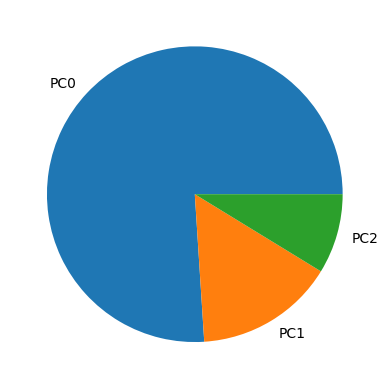

<Figure size 640x480 with 0 Axes>

In [6]:
from sklearn.decomposition import PCA


pca = PCA(n_components=0.95)

x_pca = pca.fit_transform(df[numeric_cols])
plt.pie(pca.explained_variance_ratio_,labels= [f'PC{i}' for i in range(len(pca.explained_variance_ratio_))])
plt.show()
plt.clf()

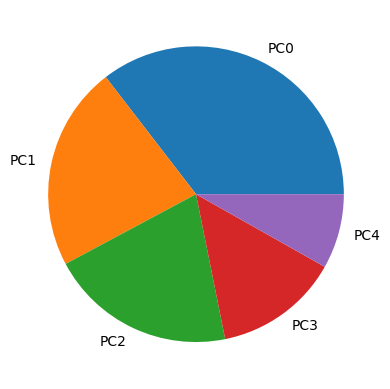

<Figure size 640x480 with 0 Axes>

In [7]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

pca_scaled = PCA(n_components=0.95)

x_pca = pca_scaled.fit_transform(df[numeric_cols])
plt.pie(pca_scaled.explained_variance_ratio_,labels= [f'PC{i}' for i in range(len(pca_scaled.explained_variance_ratio_))])
plt.show()
plt.clf()

PCA worked better on unscaled (original) data than on scaled and normalized data. 
PCA here didn't work well for dimensionality reduction, it reduced 5 numeric features into 5 PCAs
However, we can still use x_pca with models that struggle with correlations between data.
